In [1]:
%run ../load.py

../../data/dataset/recife-dados-despesas-2020.csv
../../data/dataset/recife-dados-despesas-2013.csv
../../data/dataset/recife-dados-despesas-2015.csv
../../data/dataset/recife-dados-despesas-2017.csv
../../data/dataset/recife-dados-despesas-2016.csv
../../data/dataset/recife-dados-despesas-2018.csv
../../data/dataset/recife-dados-despesas-2014.csv
../../data/dataset/recife-dados-despesas-2019.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702775 entries, 0 to 702774
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ano_movimentacao           702775 non-null  int64  
 1   mes_movimentacao           702775 non-null  int64  
 2   orgao_nome                 702775 non-null  object 
 3   unidade_nome               702775 non-null  object 
 4   categoria_economica_nome   702775 non-null  object 
 5   grupo_despesa_nome         702775 non-null  object 
 6   modalidade_aplicacao_nome  7

In [2]:
def func01 (df, z):
    x = df.groupby(['ano_movimentacao', z])\
            [['valor_pago', 'valor_liquidado']].sum().unstack()
    return x

In [3]:
def ordem (df, c, i):
    dic_ord = {'b': 1000000000, 'm': 1000000, 'k': 1000}
    df[i] = df[i] / dic_ord[c]

### PERGUNTA 3: Série histórica das despesas com o GRUPO Investimentos.

In [4]:
def anota(df, plot):
    for i, point in df.iterrows():
        for pp in point.array:
            pt = pp
            #/1000000
            plot.annotate("%.2f" % pt, (i, pp))



In [5]:
valores = ['valor_pago']

In [6]:
x = func01(df, 'grupo_despesa_nome')

for y in valores:
    ordem(x, 'm', y)
    nome = 'anoMovimentacao_' + y + '_grupo'    
    x[y].to_csv('../../data/analise/'+nome+'.csv', sep=';', decimal=',', float_format='%.2f')
    plot = x[y].plot(figsize=(20,12), style=p, title="Distribuição por Grupo")
    anota(x[y], plot)
    plot.ticklabel_format(style='plain')
    plt.xlabel('Ano de Movimentação', fontsize=14)
    plt.ylabel(y + '\n em Milhões de R$', fontsize=14)
    fig = plot.get_figure()
    fig.savefig('../../plots/'+nome)


grupo_despesa_nome  AMORTIZAÇÃO DA DÍVIDA  INVERSÕES FINANCEIRAS  \
ano_movimentacao                                                   
2013                             0.000058           0.000000e+00   
2014                             0.000057           1.500000e-07   
2015                             0.000074           1.000000e-07   
2016                             0.000064                    NaN   
2017                             0.000079                    NaN   
2018                             0.000071           3.750000e-08   
2019                             0.000089           1.200000e-06   
2020                             0.000007                    NaN   

grupo_despesa_nome  INVESTIMENTOS  JUROS E ENCARGOS DA DÍVIDA  \
ano_movimentacao                                                
2013                     0.000461                    0.000033   
2014                     0.000422                    0.000037   
2015                     0.000301                    0.000048   
2016                     0.000249                    0.000055   
2017                     0.000182                    0.000058   
2018                     0.000269                    0.000061   
2019                     0.000337                    0.000072   
2020                     0.000012                    0.000010   

grupo_despesa_nome  OUTRAS DESPESAS CORRENTES  PESSOAL E ENCARGOS SOCIAIS  
ano_movimentacao                                                           
2013                                 0.001202                    0.001560  
2014                                 0.001505                    0.001776  
2015                                 0.001573                    0.002014  
2016                                 0.001503                    0.002099  
2017                                 0.001602                    0.002269  
2018                                 0.001812                    0.002429  
2019                                 0.001915                    0.002536  
2020                                 0.000184                    0.000400

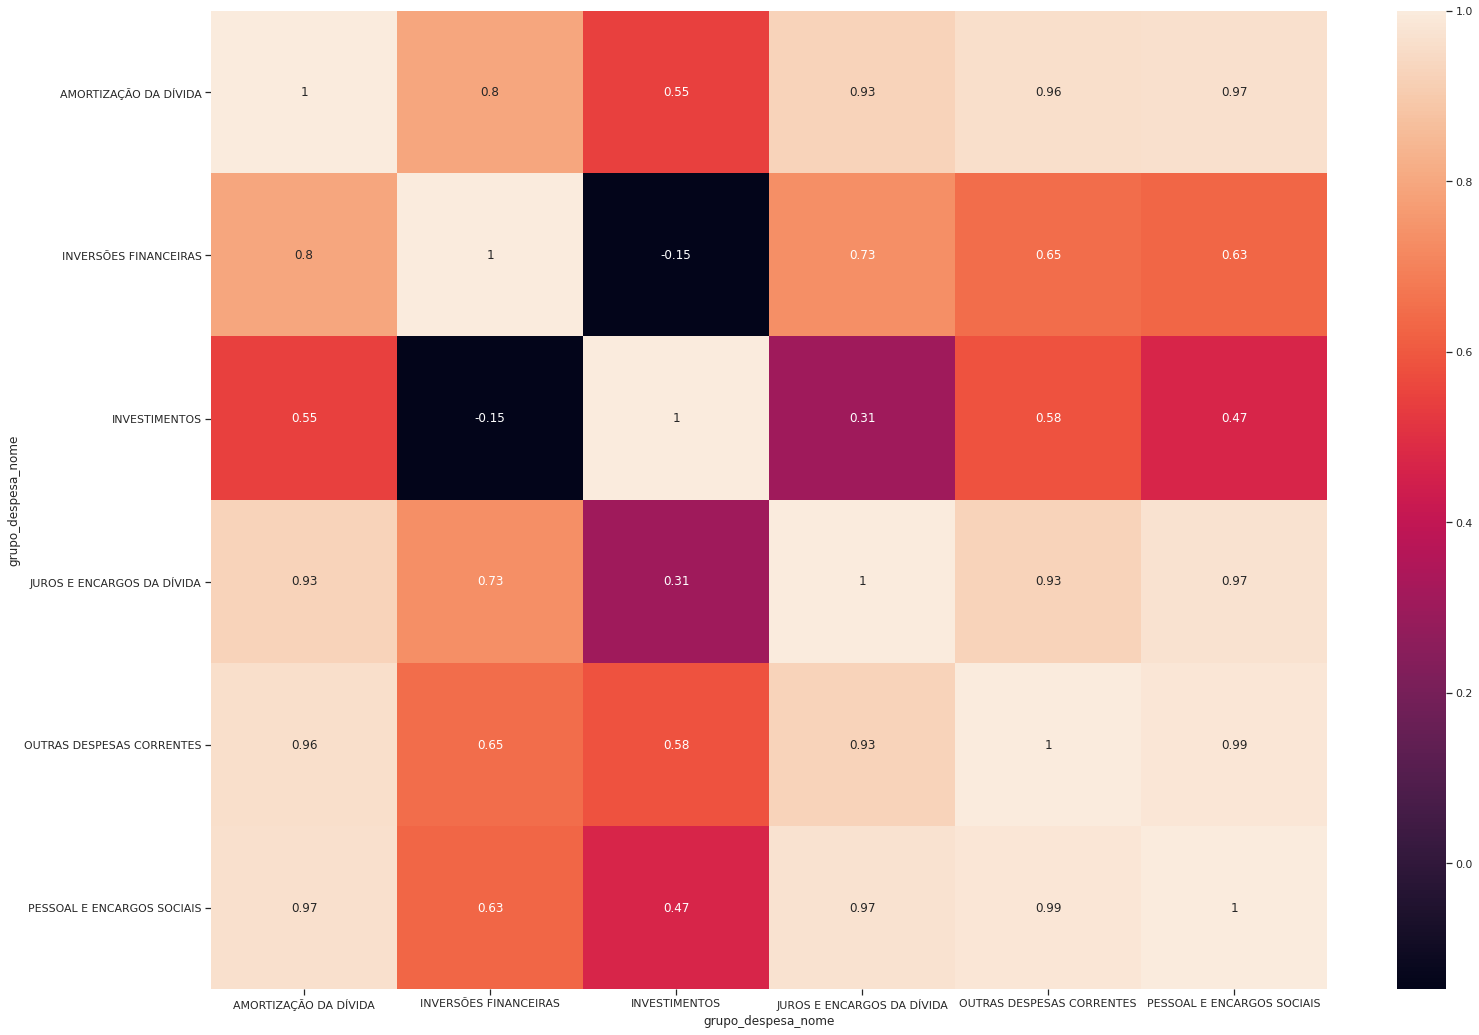

In [7]:
for y in valores:
    ordem(x, 'm', y)
    nome = 'anoMovimentacao_' + y + '_grupo'    
    #x[y].to_csv('../../data/analise/'+nome+'.csv', sep=';', decimal=',', float_format='%.2f')
    #plot = x[y].plot(figsize=(20,12), style=p, title="Distribuição por Grupo")
    fig, ax = plt.subplots(figsize=(25,18))         # Sample figsize in inches
    #fig, ax = plt.subplots(figsize=(12,10))         # Sample figsize in inches
    heat = sns.heatmap(x[y].corr(), annot=True, figure=fig)
    #anota(x[y], plot)
    #plot.ticklabel_format(style='plain')
    #plt.xlabel('Ano de Movimentação', fontsize=14)
    #plt.ylabel(y + '\n em Milhões de R$', fontsize=14)
    #fig = plot.get_figure()
    figh = heat.get_figure()
    #fig.savefig('../../plots/'+nome)
    figh.savefig('../../plots/HEAT_'+nome)

In [8]:
x = x.valor_pago

In [9]:
x.corr()


grupo_despesa_nome          AMORTIZAÇÃO DA DÍVIDA  INVERSÕES FINANCEIRAS  \
grupo_despesa_nome                                                         
AMORTIZAÇÃO DA DÍVIDA                    1.000000               0.797970   
INVERSÕES FINANCEIRAS                    0.797970               1.000000   
INVESTIMENTOS                            0.546931              -0.147805   
JUROS E ENCARGOS DA DÍVIDA               0.925787               0.732923   
OUTRAS DESPESAS CORRENTES                0.963898               0.646261   
PESSOAL E ENCARGOS SOCIAIS               0.966146               0.630157   

grupo_despesa_nome          INVESTIMENTOS  JUROS E ENCARGOS DA DÍVIDA  \
grupo_despesa_nome                                                      
AMORTIZAÇÃO DA DÍVIDA            0.546931                    0.925787   
INVERSÕES FINANCEIRAS           -0.147805                    0.732923   
INVESTIMENTOS                    1.000000                    0.306145   
JUROS E ENCARGOS DA DÍVIDA       0.306145                    1.000000   
OUTRAS DESPESAS CORRENTES        0.583402                    0.927125   
PESSOAL E ENCARGOS SOCIAIS       0.467026                    0.970232   

grupo_despesa_nome          OUTRAS DESPESAS CORRENTES  \
grupo_despesa_nome                                      
AMORTIZAÇÃO DA DÍVIDA                        0.963898   
INVERSÕES FINANCEIRAS                        0.646261   
INVESTIMENTOS                                0.583402   
JUROS E ENCARGOS DA DÍVIDA                   0.927125   
OUTRAS DESPESAS CORRENTES                    1.000000   
PESSOAL E ENCARGOS SOCIAIS                   0.985146   

grupo_despesa_nome          PESSOAL E ENCARGOS SOCIAIS  
grupo_despesa_nome                                      
AMORTIZAÇÃO DA DÍVIDA                         0.966146  
INVERSÕES FINANCEIRAS                         0.630157  
INVESTIMENTOS                                 0.467026  
JUROS E ENCARGOS DA DÍVIDA                    0.970232  
OUTRAS DESPESAS CORRENTES                     0.985146  
PESSOAL E ENCARGOS SOCIAIS                    1.000000

In [10]:


type(ax)

matplotlib.axes._subplots.AxesSubplot